In [1]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

Using TensorFlow backend.
W0827 10:22:35.478205 27796 __init__.py:690] 

  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


In [2]:
# 2. 모델 불러오기
from keras.models import load_model
model = load_model('model1.h5')

W0827 10:22:35.612844 27796 module_wrapper.py:137] From C:\Users\Bin\Anaconda3\envs\venv_ml\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 10:22:36.158387 27796 deprecation.py:506] From C:\Users\Bin\Anaconda3\envs\venv_ml\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0827 10:22:36.347877 27796 module_wrapper.py:137] From C:\Users\Bin\Anaconda3\envs\venv_ml\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0827 10:22:36.366869 27796 deprecation.py:323] From C:\Users\Bin\Anaconda3\envs\venv_ml\lib\site-packages\tensorflow_core\python\ops\nn_im

In [3]:
from glob import glob
from os import path
from pandas import read_csv, concat
from csv import writer

In [4]:
#load data
folder_path = './csv/golfvsbat/'

#파일 형식: s1_gyr.csv
golf_files = glob(path.join(folder_path, 'golf?.csv'))

df_golf = concat((read_csv(f,header=0) for f in golf_files),ignore_index=True)

df_golf.fillna(0, inplace=True)

In [5]:
def resizedataseq(df,seqlen):
    totlen = len(df)
    Qx = list(df.iloc[-1:-6:-1,0])
    Qy = list(df.iloc[-1:-6:-1,1])
    Qz = list(df.iloc[-1:-6:-1,2])
    
    
    while totlen != seqlen:
        mx = np.mean(Qx)
        my = np.mean(Qy)
        mz = np.mean(Qz)

        if totlen <seqlen:
            Qx.pop(0)
            Qy.pop(0)
            Qz.pop(0)
            Qx.append(mx)
            Qy.append(my)
            Qz.append(mz)
            #행추가
            df.loc[totlen]=[mx,my,mz]
            totlen = totlen+1
        
        
        elif totlen > seqlen:
            #행삭제
            df = df.iloc[:seqlen,:]
            totlen = seqlen
            break
            
        
    return df

In [6]:
X = np.empty(shape=(1,140,3))
y = []
#swing은 1 perting은 0
start = 1
end = 0

for i in range(1,len(df_golf)):
    if i==len(df_golf)-1:
        end = i-1
        #subset = df_swing[start:end][1:].astype(float)
        #print(np.mean(subset))
        subset= df_golf.iloc[start:end,1:].astype(float)
        #print(len(subset))
        subset= resizedataseq(subset,140)
        start = i+1
        if len(subset) == 140:
            subset = subset.values
            subset=subset[np.newaxis]
            X =np.concatenate((X,subset))
            print(subset.shape)
            y.append(1)

            
    if df_golf['time'][i] == 'Started:':
        end = i-1
        #subset = df_swing[start:end][1:].astype(float)
        #print(np.mean(subset))
        subset= df_golf.iloc[start:end,1:].astype(float)
        #print(len(subset))
        subset= resizedataseq(subset,140)
        start = i+1
        if len(subset) == 140:
            subset = subset.values
            subset=subset[np.newaxis]
            X =np.concatenate((X,subset))
            print(subset.shape)
            y.append(1)
        
        
print(X.shape)

(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(4, 140, 3)


In [7]:
X=np.delete(X,0,axis=0)

In [8]:
len(X)

3

In [9]:
X.shape

(3, 140, 3)

In [10]:
for index in np.random.choice(len(X), 3, replace = False):
    predicted = model.predict(X[index:index + 1])[0]
    #label = y_test[index]
    #result_label = np.where(label == np.amax(label))
    
    #result_predicted = np.where(predicted == np.amax(predicted))
    print(predicted)

[0.4102364 0.5764091]
[0.18051009 0.85341305]
[0.23257405 0.8097775 ]


In [11]:
t=read_csv('./csv/golfvsbat/golf1.csv')

In [12]:
t = t.iloc[1:,1:].astype(float)

In [13]:
import pandas

In [14]:
t=t.reindex(range(len(t)))
t.fillna(0, inplace=True)

In [15]:
t=resizedataseq(t,140)

In [16]:
for index in np.random.choice(len(X), 3, replace = False):
    predicted = model.predict(X[index:index + 1])[0]
    #label = y_test[index]
    #result_label = np.where(label == np.amax(label))
    
    #result_predicted = np.where(predicted == np.amax(predicted))
    print(predicted)

[0.23257405 0.8097775 ]
[0.18051009 0.85341305]
[0.41023642 0.57640904]


In [17]:
t=t.values

In [18]:
t.shape

(140, 3)

In [19]:
import numpy as np

In [20]:
t=t[np.newaxis]

In [21]:
t[0:1].shape

(1, 140, 3)

In [22]:
model.predict(t[0:1])

array([[0.3268433 , 0.67124265]], dtype=float32)

In [23]:
t=read_csv('./csv/test-4.csv')
t = t.iloc[1:,1:4].astype(float)
t=resizedataseq(t,140)

In [24]:
#t

In [25]:
t=t.values
t=t[np.newaxis]
t.shape

(1, 140, 3)

In [26]:
model.predict(t[0:1])

array([[0.41789046, 0.58819133]], dtype=float32)

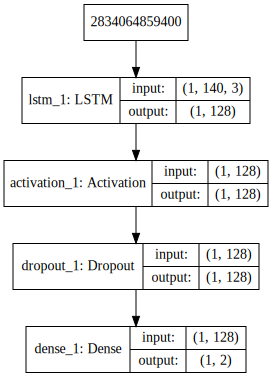

In [27]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [28]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = tf.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph

In [29]:
from keras import backend as K
import tensorflow as tf

# Create, compile and train model...

frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs])

W0827 10:22:44.632772 27796 deprecation.py:323] From <ipython-input-28-0d92ab84a915>:26: convert_variables_to_constants (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
W0827 10:22:44.634718 27796 deprecation.py:323] From C:\Users\Bin\Anaconda3\envs\venv_ml\lib\site-packages\tensorflow_core\python\framework\graph_util_impl.py:277: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


In [30]:
frozen_graph.DESCRIPTOR.fields

In [31]:
frozen_graph.DESCRIPTOR.fields_by_name

{'node': <google.protobuf.descriptor.FieldDescriptor at 0x293d348a208>,
 'versions': <google.protobuf.descriptor.FieldDescriptor at 0x293d399c248>,
 'version': <google.protobuf.descriptor.FieldDescriptor at 0x293d399c308>,
 'library': <google.protobuf.descriptor.FieldDescriptor at 0x293d399c388>}

In [32]:
frozen_graph.DESCRIPTOR.name

'GraphDef'

In [33]:
frozen_graph.node

[name: "lstm_1_input"
op: "Placeholder"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "shape"
  value {
    shape {
      dim {
        size: 1
      }
      dim {
        size: 140
      }
      dim {
        size: 3
      }
    }
  }
}
, name: "lstm_1/kernel"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "value"
  value {
    tensor {
      dtype: DT_FLOAT
      tensor_shape {
        dim {
          size: 3
        }
        dim {
          size: 512
        }
      }
      tensor_content: "c\301\225=\212X\335\275\000A\260\275\350;\206=7\024\203;\023\036r\275q#\031=+\021\230=.(\267<eLZ\274EZ\320\271\223t\223\275\036\316\177=\205y\017\274\221\031\337<P\374/\275\302\242}=\234\333\222\275\214\024\240\273\221\247D\275\246\223d=\336<\253=\243\262:=\316\2439\275Kl\377\274\003\333H\275\314\007@=\020\365B=\342\010#<U\375\370\274N\354\310=a\345\323=\342\353U\275\n\362\301\275\227\247\325\275#\363\311\275o\r\325\275\031\034\014\275

In [34]:
tf.train.write_graph(frozen_graph, "./", "my_model.pb", as_text=False)

'./my_model.pb'

In [35]:
type(frozen_graph.DESCRIPTOR)

google.protobuf.descriptor.Descriptor

In [36]:
type(frozen_graph)

tensorflow.core.framework.graph_pb2.GraphDef

In [37]:
frozen_graph

node {
  name: "lstm_1_input"
  op: "Placeholder"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
        dim {
          size: 1
        }
        dim {
          size: 140
        }
        dim {
          size: 3
        }
      }
    }
  }
}
node {
  name: "lstm_1/kernel"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
          dim {
            size: 3
          }
          dim {
            size: 512
          }
        }
        tensor_content: "c\301\225=\212X\335\275\000A\260\275\350;\206=7\024\203;\023\036r\275q#\031=+\021\230=.(\267<eLZ\274EZ\320\271\223t\223\275\036\316\177=\205y\017\274\221\031\337<P\374/\275\302\242}=\234\333\222\275\214\024\240\273\221\247D\275\246\223d=\336<\253=\243\262:=\316\2439\275Kl\377\274\003\333H\275\314\007@=\020\365B=\342\010#<U\375\370\2

In [38]:
with open('./my_model.pb', "rb") as f:
    frozen_graph.ParseFromString(f.read())
    print(f)

<_io.BufferedReader name='./my_model.pb'>


In [39]:
g = tf.import_graph_def(frozen_graph)

In [40]:
import tensorflow as tf
gf = tf.GraphDef()   
m_file = open('my_model.pb','rb')
gf.ParseFromString(m_file.read())

with open('somefile.txt', 'a') as the_file:
    for n in gf.node:
        the_file.write(n.name+'\n')

file = open('somefile.txt','r')
data = file.readlines()
print ("output name = ")
print (data[len(data)-1])

print ("Input name = ")
file.seek ( 0 )
print (file.readline())

output name = 
training/SGD/Variable_4

Input name = 
lstm_1_input



In [41]:

graph_def_file = "./my_model.pb"
input_arrays = ["lstm_1_input"]
output_arrays = ["training/SGD/Variable_4"]

converter = tf.lite.TFLiteConverter.from_frozen_graph(
  graph_def_file, input_arrays, output_arrays)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

752

In [51]:
import numpy as np
import tensorflow as tf

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="converted_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


# Test model on random input data.
input_shape = input_details[0]['shape']

input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)



interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
print(interpreter.tensor(output_details[0]['index']))
print(output_data)

<function Interpreter.tensor.<locals>.<lambda> at 0x00000293DEA50048>
[-0.00156957  0.00143685]


In [52]:
input_data

array([[[5.55524468e-01, 3.88306737e-01, 1.59578860e-01],
        [8.94497752e-01, 8.05272043e-01, 2.75173724e-01],
        [9.76336777e-01, 9.79128033e-02, 5.47197521e-01],
        [9.50870156e-01, 6.87870741e-01, 7.37209201e-01],
        [6.07691765e-01, 7.10957050e-01, 9.69295979e-01],
        [2.43130386e-01, 7.74628580e-01, 9.16574538e-01],
        [9.65557456e-01, 1.46098271e-01, 8.66044819e-01],
        [4.57117409e-01, 5.66838443e-01, 9.48277473e-01],
        [3.74363750e-01, 7.83656955e-01, 6.98324502e-01],
        [2.33966142e-01, 4.58669007e-01, 3.37706089e-01],
        [2.04658657e-01, 2.27945641e-01, 9.58210707e-01],
        [7.82443225e-01, 3.14450711e-02, 5.57748258e-01],
        [9.93517280e-01, 8.39558840e-01, 4.23663586e-01],
        [8.15030575e-01, 5.13418317e-01, 3.67118686e-01],
        [7.53477693e-01, 6.49409354e-01, 8.58981386e-02],
        [7.23486960e-01, 8.41057956e-01, 6.12717986e-01],
        [6.97097600e-01, 7.41985977e-01, 5.40319383e-01],
        [7.363

In [69]:
len(output_details)

1

In [63]:
type(output_details)

list

In [44]:
input_details

[{'name': 'lstm_1_input',
  'index': 0,
  'shape': array([  1, 140,   3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]

In [45]:
output_details

[{'name': 'training/SGD/Variable_4',
  'index': 1,
  'shape': array([2]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]

In [46]:
input_details[0]['index']

0

In [47]:
output_details[0]['index']

1

In [48]:
input_shape

array([  1, 140,   3])

In [49]:
interpreter

In [50]:
output_data

array([-0.000781  ,  0.00082611], dtype=float32)

In [51]:
interpreter